<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/10_Study_case/10_Case_studies_Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UCZENIE NIENADZOROWANE /  UNSUPERVISED LEARNING

# Case studies - Image segmentation

A basic library for machine learning in Python
To install the scikit-learn library, use the command below:
```
!pip install scikit-learn
```

To install OpenCV, use the command below:
```
!pip install opencv-python
```

To update to the latest version of the scikit-learn library and openCV, use the command below:
```
!pip install --upgrade scikit-learn
!pip install --upgrade opencv-python
```

### Contents:
1. [Import libraries](#0)
2. [Picture downloading](#1)
3. [Eksploration](#2)
4. [KMeans](#3)
5. [Cluster - visualisation](#4)




### <a name='0'></a> Import libraries

In [ ]:
!pip install opencv-python

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

### <a name='1'></a> Picture downloading

In [2]:
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/green.jpg
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/ski.jpg
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/view.jpg

--2023-06-29 18:50:55--  https://storage.googleapis.com/esmartdata-courses-files/ml-course/green.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12300 (12K) [image/jpeg]
Saving to: ‘green.jpg’

green.jpg           100%[===================>]  12.01K  --.-KB/s    in 0s      

2023-06-29 18:50:57 (97.7 MB/s) - ‘green.jpg’ saved [12300/12300]

--2023-06-29 18:50:57--  https://storage.googleapis.com/esmartdata-courses-files/ml-course/ski.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71376 (70K) [image/jpeg]
Saving to: ‘ski.jpg’

ski.jpg             100%[=======

### <a name='2'></a> Eksploration

In [45]:
import matplotlib.pyplot as plt
img=cv2.imread('/content/view.jpg')




In [47]:
img.shape

(351, 512, 3)

In [48]:
img

array([[[120,  93,  79],
        [121,  92,  78],
        [121,  92,  78],
        ...,
        [119,  76,  59],
        [118,  75,  56],
        [110,  67,  48]],

       [[119,  92,  78],
        [121,  92,  78],
        [120,  91,  77],
        ...,
        [117,  77,  59],
        [120,  77,  60],
        [116,  74,  55]],

       [[119,  92,  78],
        [118,  91,  77],
        [120,  91,  77],
        ...,
        [120,  84,  66],
        [114,  76,  58],
        [112,  72,  54]],

       ...,

       [[114,  97, 100],
        [114,  98,  99],
        [135, 117, 116],
        ...,
        [ 43,  27,  21],
        [ 52,  36,  30],
        [ 56,  40,  34]],

       [[110,  93,  96],
        [131, 115, 116],
        [130, 112, 111],
        ...,
        [ 45,  28,  25],
        [ 43,  27,  21],
        [ 40,  24,  18]],

       [[119, 102, 105],
        [128, 112, 113],
        [123, 105, 104],
        ...,
        [ 58,  41,  38],
        [ 53,  36,  33],
        [ 44,  27,  24]]

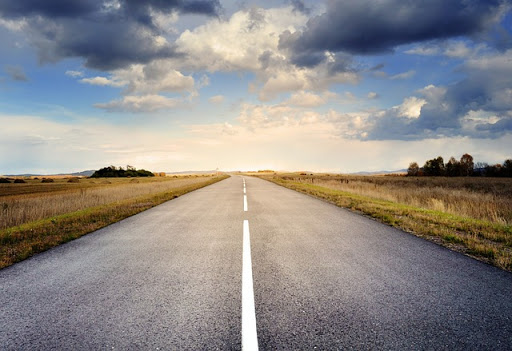

In [49]:
cv2_imshow(img)

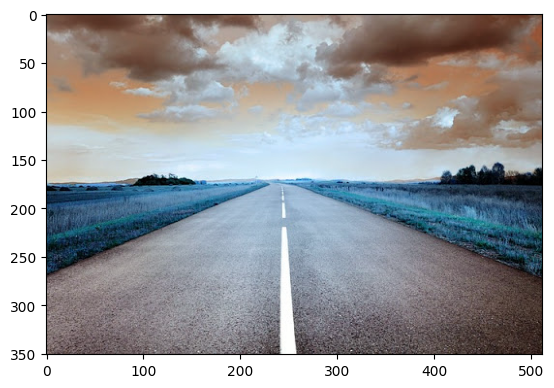

In [50]:
plt.imshow(img)

In [51]:
#preapare picture to model
img_data=img.reshape(-1,3)
img_data = np.float32(img_data)
img_data.shape

(179712, 3)

In [52]:
df=pd.DataFrame(data=img_data, columns=['dim1','dim2','dim3'])
df.head(10)

,dim1,dim2,dim3
0,120.0,93.0,79.0
1,121.0,92.0,78.0
2,121.0,92.0,78.0
3,120.0,91.0,77.0
4,119.0,90.0,75.0
5,120.0,89.0,74.0
6,119.0,88.0,73.0
7,119.0,88.0,73.0
8,119.0,86.0,71.0
9,118.0,85.0,70.0


Image segmentation with KMeans algorithm

https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html

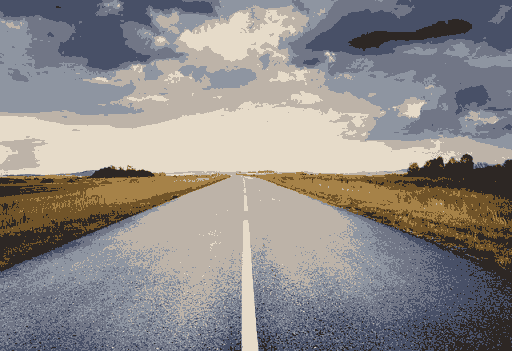

In [53]:
ret,label, center=cv2.kmeans(
 data=img_data, #flaot32 data type
 K=8, # cluster number
 bestLabels=None,
 # define criteria, number of clusters(K) and apply kmeans()
 criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10,1.0), #Stopping criterion(type, max_iter, epsilon)
 attempts=10, #number of start-ups
 flags=cv2.KMEANS_RANDOM_CENTERS # define initzialing of the centroids
)
# Now convert back into uint8, and make original image
center=np.uint8(center)
res=center[label.flatten()]
res=res.reshape((img.shape))
cv2_imshow(res)

In [70]:
def make_kmeans(n_neighbor=2, img_name='/content/view.jpg'):
  #loading picture
  img=cv2.imread(img_name)
  cv2_imshow(img)

  # preaparing picture

  img_data=img.reshape(-1,3)
  img_data = np.float32(img_data)
  img_data.shape

  #kmeans
  ret,label, center=cv2.kmeans(
  data=img_data, #flaot32 data type
  K=n_neighbor, # cluster number
  bestLabels=None,
 # define criteria, number of clusters(K) and apply kmeans()
  criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10,1.0), #Stopping criterion(type, max_iter, epsilon)
  attempts=10, #number of start-ups
  flags=cv2.KMEANS_RANDOM_CENTERS) # define initzialing of the centroids
# Now convert back into uint8, and make original image
  center=np.uint8(center)
  res=center[label.flatten()]
  res=res.reshape((img.shape))
  cv2_imshow(res)
  # Now separate the data, Note the flatten()
  A = img_data[label.ravel()==0]
  B = img_data[label.ravel()==1]
# Plot the data
  plt.scatter(A[:,0],A[:,1])
  plt.scatter(B[:,0],B[:,1],c = 'r')
  plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
  plt.xlabel('Height'),plt.ylabel('Weight')
  plt.show()

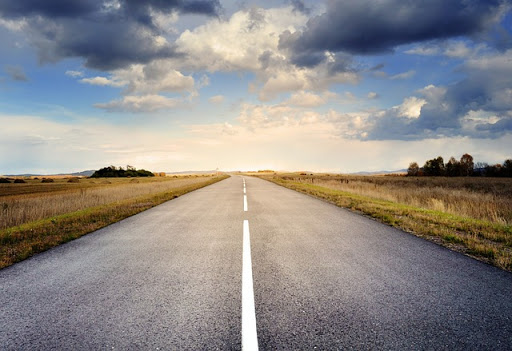

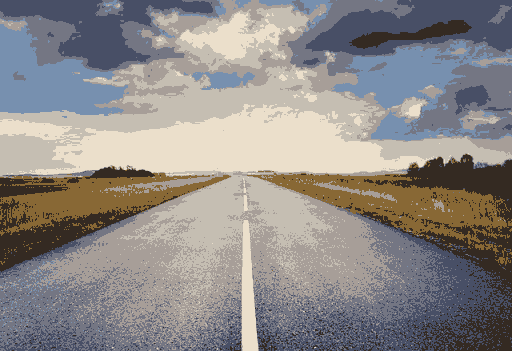

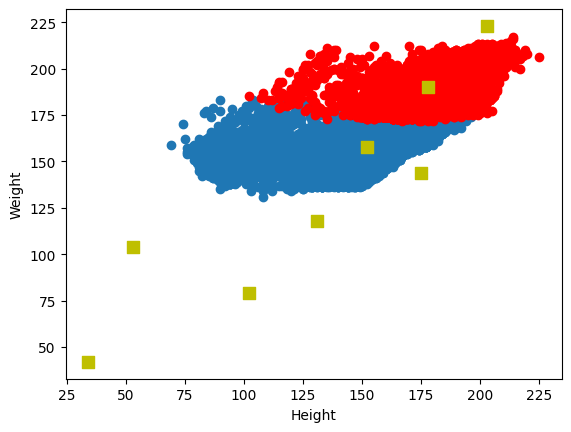

In [71]:
make_kmeans(8,'/content/view.jpg')

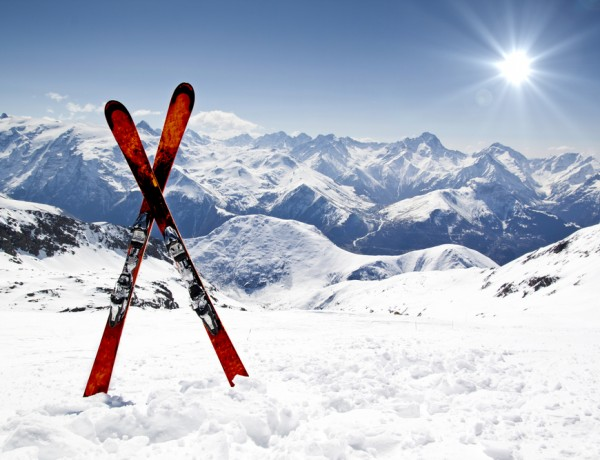

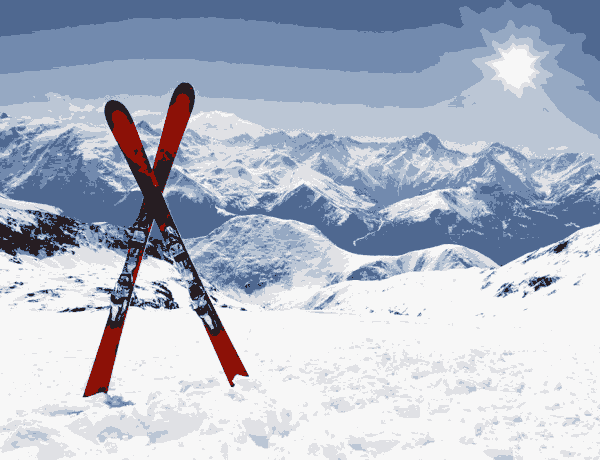

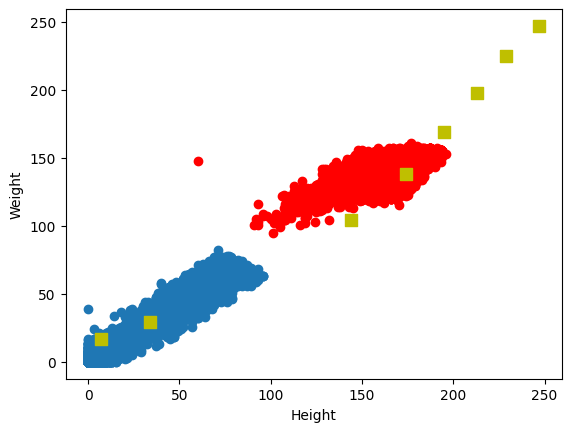

In [72]:
make_kmeans(8,'/content/ski.jpg')

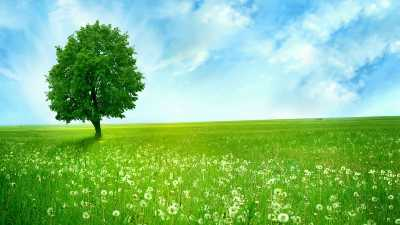

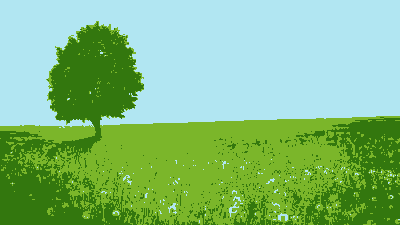

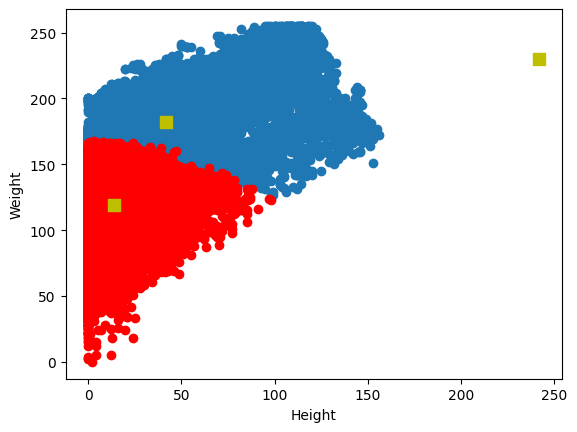

In [73]:
make_kmeans(3,'/content/green.jpg')

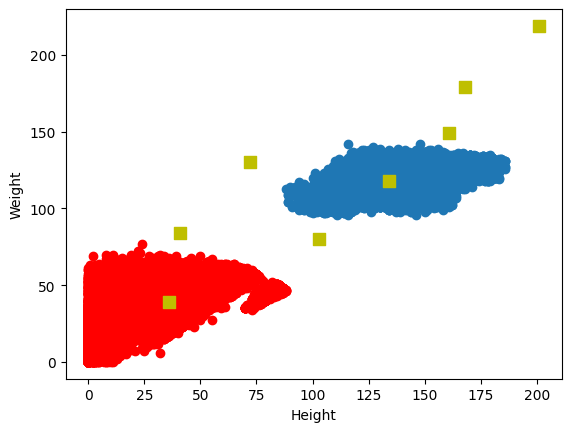